**The data set is about banking details of customers. 'Personal_Loan' column tells if the customer took a personal loan or not. We need to predict if a person has potential to avail a loan.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
from sklearn.neural_network import MLPClassifier # 'MLP' in 'MLPClassifier' stands for Multi-Layer Perceptron

# 'Perceptron' was the earlier name for 'Neural Networks'

# 'MLPClassifier' is used for machine-learning problems. For Deep Learning we use packages like Keras, Tensorflow etc. that handle
# larger datasets with same neural network algorithms.

In [2]:
#Only run this code snippet if your dataset is located in a different directory than the directory you are running your
#Jupyter Notebook.

#import os
#os.chdir("`")

In [3]:
bank=pd.read_csv("Bank Dataset.csv")

In [4]:
bank.head()

,ID,Age,Experience,Income,ZIP_Code,Family_members,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4982 entries, 0 to 4981
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  4982 non-null   int64  
 1   Age                 4982 non-null   int64  
 2   Experience          4982 non-null   int64  
 3   Income              4982 non-null   int64  
 4   ZIP_Code            4982 non-null   int64  
 5   Family_members      4982 non-null   int64  
 6   CCAvg               4982 non-null   float64
 7   Education           4982 non-null   int64  
 8   Mortgage            4982 non-null   int64  
 9   Personal_Loan       4982 non-null   int64  
 10  Securities_Account  4982 non-null   int64  
 11  CD_Account          4982 non-null   int64  
 12  Online              4982 non-null   int64  
 13  CreditCard          4982 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 545.0 KB


In [6]:
bank = bank.drop(['ID','ZIP_Code'], axis=1)
bank.head()

,Age,Experience,Income,Family_members,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
y = bank['Personal_Loan']
x = bank.drop(['Personal_Loan'], axis=1)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.30, random_state=27)

**For MLPClassifier, scaling is a necessity.**

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
sc = StandardScaler()

In [12]:
x_train = sc.fit_transform(x_train)

In [13]:
x_train

array([[ 0.22702424,  0.15893175,  1.41450874, ...,  3.92057292,
         0.83032402,  1.55627193],
       [-0.99936387, -0.89167492,  0.78275964, ..., -0.25506476,
         0.83032402, -0.64256122],
       [-0.64896727, -0.54147269, -0.76393643, ..., -0.25506476,
         0.83032402, -0.64256122],
       ...,
       [-0.38616981, -0.27882103, -0.06683397, ..., -0.25506476,
         0.83032402,  1.55627193],
       [-0.29857066, -0.19127047, -1.13427211, ..., -0.25506476,
         0.83032402, -0.64256122],
       [ 1.7162098 ,  1.73484175,  0.95703526, ...,  3.92057292,
         0.83032402,  1.55627193]])

**In scaling operations, during fit(), the means and standard deviations of features are calculated. During transform(), the calculated means and standard deviations of features are applied to each observation of respective features for calculation of z-scores. During fit_transform(), both happen.**

**Similarily, in all fit and tranform operations, values for calculation are found in fit step, and the values are applied to formula for each row of feature in transform step, and fit_tranform does both.**

**We already fitted the model with means and standard deviations of training data. Usually means and standard deviations of test and training data are different. In order to maintain uniformity in scaling, we perform only a transform for test data below.**

Refer for details: https://www.analyticsvidhya.com/blog/2021/04/difference-between-fit-transform-fit_transform-methods-in-scikit-learn-with-python-code/

In [14]:
x_test = sc.transform(x_test)

In [15]:
x_test

array([[-1.34976047e+00, -1.41697825e+00,  1.29226092e-01, ...,
        -2.55064762e-01, -1.20434911e+00, -6.42561224e-01],
       [ 1.45341235e+00,  1.47219008e+00, -1.39568553e+00, ...,
        -2.55064762e-01,  8.30324024e-01, -6.42561224e-01],
       [-1.52495877e+00, -1.50452880e+00, -1.48061803e-03, ...,
        -2.55064762e-01, -1.20434911e+00, -6.42561224e-01],
       ...,
       [-2.10971513e-01, -1.91270471e-01, -7.85720880e-01, ...,
        -2.55064762e-01,  8.30324024e-01, -6.42561224e-01],
       [-2.98570664e-01, -1.91270471e-01,  1.54521545e+00, ...,
        -2.55064762e-01, -1.20434911e+00, -6.42561224e-01],
       [ 1.45341235e+00,  1.38463953e+00, -3.06462942e-01, ...,
        -2.55064762e-01,  8.30324024e-01, -6.42561224e-01]])

In [22]:
# 'hidden_layer_sizes = 100' means there is going to be 1 hidden layer with 100 neurons in it.
# 'hidden_layer_sizes = [100,100,100]' means there are going to be 3 hidden layers with 100 neurons in each of it.
# Generally, 'hidden_layer_sizes' can be square or square root of no. of independent features. Here we have 11 independent
# features so we take 100 as 'hidden_layer_sizes' (100 is roughly 11^2). We can also assign a value of 3 or 4(roughly square
# root of 11).

# 'max_iter=500' doesn't allow the model to run more than 500 times for updating the synaptic weights

# solver='sgd' means SGD(Stochastic Gradient Descent) will be used for calculations

# 'verbose=True' indicates to print the output after execution

# 'random_state' if assigned ensures same synaptic weights to be assigned randomly during the 1st go every time model runs

# 'tol' is tolerance or threshold. If 'tol' is very low, model takes more time to run.

clf = MLPClassifier(hidden_layer_sizes=100, max_iter=500,
                     solver='sgd', verbose=True,  random_state=21,tol=0.0000001)

In [23]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

# the iteration no. along with corresponding loss is printed

Iteration 1, loss = 0.64337742
Iteration 2, loss = 0.57200145
Iteration 3, loss = 0.50925782
Iteration 4, loss = 0.46310156
Iteration 5, loss = 0.42893914
Iteration 6, loss = 0.40240410
Iteration 7, loss = 0.38109913
Iteration 8, loss = 0.36349894
Iteration 9, loss = 0.34854138
Iteration 10, loss = 0.33552069
Iteration 11, loss = 0.32394017
Iteration 12, loss = 0.31366579
Iteration 13, loss = 0.30439043
Iteration 14, loss = 0.29594532
Iteration 15, loss = 0.28805189
Iteration 16, loss = 0.28083580
Iteration 17, loss = 0.27416434
Iteration 18, loss = 0.26794322
Iteration 19, loss = 0.26211477
Iteration 20, loss = 0.25668754
Iteration 21, loss = 0.25157118
Iteration 22, loss = 0.24682533
Iteration 23, loss = 0.24234252
Iteration 24, loss = 0.23816454
Iteration 25, loss = 0.23413897
Iteration 26, loss = 0.23031545
Iteration 27, loss = 0.22676508
Iteration 28, loss = 0.22330409
Iteration 29, loss = 0.22005055
Iteration 30, loss = 0.21691629
Iteration 31, loss = 0.21398075
Iteration 32, los

Iteration 256, loss = 0.07971936
Iteration 257, loss = 0.07956553
Iteration 258, loss = 0.07943508
Iteration 259, loss = 0.07931275
Iteration 260, loss = 0.07918757
Iteration 261, loss = 0.07906138
Iteration 262, loss = 0.07894094
Iteration 263, loss = 0.07881696
Iteration 264, loss = 0.07870225
Iteration 265, loss = 0.07859690
Iteration 266, loss = 0.07845510
Iteration 267, loss = 0.07833440
Iteration 268, loss = 0.07821716
Iteration 269, loss = 0.07810464
Iteration 270, loss = 0.07797877
Iteration 271, loss = 0.07785562
Iteration 272, loss = 0.07774402
Iteration 273, loss = 0.07762989
Iteration 274, loss = 0.07752314
Iteration 275, loss = 0.07740750
Iteration 276, loss = 0.07728929
Iteration 277, loss = 0.07719720
Iteration 278, loss = 0.07706475
Iteration 279, loss = 0.07694609
Iteration 280, loss = 0.07683890
Iteration 281, loss = 0.07672597
Iteration 282, loss = 0.07661170
Iteration 283, loss = 0.07650688
Iteration 284, loss = 0.07640453
Iteration 285, loss = 0.07629004
Iteration 

C:\Users\Jitu\AppData\Roaming\Python\Python38\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


**Above we see in warning that maximum iterations (500) reached and the optimization hasn't converged yet. May be we can increase 'max_iter' to 5000**

In [26]:
clf = MLPClassifier(hidden_layer_sizes=100, max_iter=5000,
                     solver='sgd', verbose=True,  random_state=21,tol=0.000000001)

In [27]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

Iteration 1, loss = 0.64337742
Iteration 2, loss = 0.57200145
Iteration 3, loss = 0.50925782
Iteration 4, loss = 0.46310156
Iteration 5, loss = 0.42893914
Iteration 6, loss = 0.40240410
Iteration 7, loss = 0.38109913
Iteration 8, loss = 0.36349894
Iteration 9, loss = 0.34854138
Iteration 10, loss = 0.33552069
Iteration 11, loss = 0.32394017
Iteration 12, loss = 0.31366579
Iteration 13, loss = 0.30439043
Iteration 14, loss = 0.29594532
Iteration 15, loss = 0.28805189
Iteration 16, loss = 0.28083580
Iteration 17, loss = 0.27416434
Iteration 18, loss = 0.26794322
Iteration 19, loss = 0.26211477
Iteration 20, loss = 0.25668754
Iteration 21, loss = 0.25157118
Iteration 22, loss = 0.24682533
Iteration 23, loss = 0.24234252
Iteration 24, loss = 0.23816454
Iteration 25, loss = 0.23413897
Iteration 26, loss = 0.23031545
Iteration 27, loss = 0.22676508
Iteration 28, loss = 0.22330409
Iteration 29, loss = 0.22005055
Iteration 30, loss = 0.21691629
Iteration 31, loss = 0.21398075
Iteration 32, los

Iteration 255, loss = 0.07981900
Iteration 256, loss = 0.07971936
Iteration 257, loss = 0.07956553
Iteration 258, loss = 0.07943508
Iteration 259, loss = 0.07931275
Iteration 260, loss = 0.07918757
Iteration 261, loss = 0.07906138
Iteration 262, loss = 0.07894094
Iteration 263, loss = 0.07881696
Iteration 264, loss = 0.07870225
Iteration 265, loss = 0.07859690
Iteration 266, loss = 0.07845510
Iteration 267, loss = 0.07833440
Iteration 268, loss = 0.07821716
Iteration 269, loss = 0.07810464
Iteration 270, loss = 0.07797877
Iteration 271, loss = 0.07785562
Iteration 272, loss = 0.07774402
Iteration 273, loss = 0.07762989
Iteration 274, loss = 0.07752314
Iteration 275, loss = 0.07740750
Iteration 276, loss = 0.07728929
Iteration 277, loss = 0.07719720
Iteration 278, loss = 0.07706475
Iteration 279, loss = 0.07694609
Iteration 280, loss = 0.07683890
Iteration 281, loss = 0.07672597
Iteration 282, loss = 0.07661170
Iteration 283, loss = 0.07650688
Iteration 284, loss = 0.07640453
Iteration 

Iteration 504, loss = 0.06216177
Iteration 505, loss = 0.06211421
Iteration 506, loss = 0.06207569
Iteration 507, loss = 0.06204247
Iteration 508, loss = 0.06199866
Iteration 509, loss = 0.06195857
Iteration 510, loss = 0.06191065
Iteration 511, loss = 0.06187679
Iteration 512, loss = 0.06183704
Iteration 513, loss = 0.06179198
Iteration 514, loss = 0.06175440
Iteration 515, loss = 0.06171182
Iteration 516, loss = 0.06167362
Iteration 517, loss = 0.06163272
Iteration 518, loss = 0.06159330
Iteration 519, loss = 0.06155424
Iteration 520, loss = 0.06152550
Iteration 521, loss = 0.06147128
Iteration 522, loss = 0.06143729
Iteration 523, loss = 0.06140107
Iteration 524, loss = 0.06137094
Iteration 525, loss = 0.06132047
Iteration 526, loss = 0.06128587
Iteration 527, loss = 0.06124161
Iteration 528, loss = 0.06120414
Iteration 529, loss = 0.06116527
Iteration 530, loss = 0.06112858
Iteration 531, loss = 0.06110184
Iteration 532, loss = 0.06104752
Iteration 533, loss = 0.06101272
Iteration 

Iteration 753, loss = 0.05449058
Iteration 754, loss = 0.05446023
Iteration 755, loss = 0.05444238
Iteration 756, loss = 0.05441416
Iteration 757, loss = 0.05439504
Iteration 758, loss = 0.05436971
Iteration 759, loss = 0.05434855
Iteration 760, loss = 0.05431674
Iteration 761, loss = 0.05429764
Iteration 762, loss = 0.05427216
Iteration 763, loss = 0.05424937
Iteration 764, loss = 0.05422804
Iteration 765, loss = 0.05421317
Iteration 766, loss = 0.05418256
Iteration 767, loss = 0.05415878
Iteration 768, loss = 0.05413328
Iteration 769, loss = 0.05411528
Iteration 770, loss = 0.05408797
Iteration 771, loss = 0.05406712
Iteration 772, loss = 0.05404049
Iteration 773, loss = 0.05402046
Iteration 774, loss = 0.05398861
Iteration 775, loss = 0.05397287
Iteration 776, loss = 0.05394374
Iteration 777, loss = 0.05392397
Iteration 778, loss = 0.05391067
Iteration 779, loss = 0.05387534
Iteration 780, loss = 0.05385302
Iteration 781, loss = 0.05383815
Iteration 782, loss = 0.05380649
Iteration 

Iteration 1006, loss = 0.04958223
Iteration 1007, loss = 0.04957848
Iteration 1008, loss = 0.04955800
Iteration 1009, loss = 0.04954088
Iteration 1010, loss = 0.04952657
Iteration 1011, loss = 0.04949868
Iteration 1012, loss = 0.04948501
Iteration 1013, loss = 0.04947450
Iteration 1014, loss = 0.04944937
Iteration 1015, loss = 0.04944089
Iteration 1016, loss = 0.04942630
Iteration 1017, loss = 0.04940751
Iteration 1018, loss = 0.04938867
Iteration 1019, loss = 0.04937510
Iteration 1020, loss = 0.04935955
Iteration 1021, loss = 0.04934628
Iteration 1022, loss = 0.04932877
Iteration 1023, loss = 0.04931270
Iteration 1024, loss = 0.04929957
Iteration 1025, loss = 0.04928068
Iteration 1026, loss = 0.04927080
Iteration 1027, loss = 0.04925658
Iteration 1028, loss = 0.04923913
Iteration 1029, loss = 0.04923008
Iteration 1030, loss = 0.04920530
Iteration 1031, loss = 0.04919274
Iteration 1032, loss = 0.04917695
Iteration 1033, loss = 0.04916740
Iteration 1034, loss = 0.04914904
Iteration 1035

Iteration 1248, loss = 0.04628792
Iteration 1249, loss = 0.04628100
Iteration 1250, loss = 0.04627873
Iteration 1251, loss = 0.04625883
Iteration 1252, loss = 0.04624571
Iteration 1253, loss = 0.04623562
Iteration 1254, loss = 0.04621751
Iteration 1255, loss = 0.04620766
Iteration 1256, loss = 0.04620474
Iteration 1257, loss = 0.04618368
Iteration 1258, loss = 0.04617349
Iteration 1259, loss = 0.04615931
Iteration 1260, loss = 0.04614701
Iteration 1261, loss = 0.04613966
Iteration 1262, loss = 0.04613335
Iteration 1263, loss = 0.04611307
Iteration 1264, loss = 0.04610514
Iteration 1265, loss = 0.04609448
Iteration 1266, loss = 0.04608781
Iteration 1267, loss = 0.04606446
Iteration 1268, loss = 0.04605640
Iteration 1269, loss = 0.04604267
Iteration 1270, loss = 0.04602554
Iteration 1271, loss = 0.04601830
Iteration 1272, loss = 0.04600852
Iteration 1273, loss = 0.04600437
Iteration 1274, loss = 0.04598002
Iteration 1275, loss = 0.04597959
Iteration 1276, loss = 0.04596726
Iteration 1277

Iteration 1729, loss = 0.04163590
Iteration 1730, loss = 0.04162816
Iteration 1731, loss = 0.04161825
Iteration 1732, loss = 0.04161078
Iteration 1733, loss = 0.04160651
Iteration 1734, loss = 0.04160032
Iteration 1735, loss = 0.04158669
Iteration 1736, loss = 0.04157874
Iteration 1737, loss = 0.04157574
Iteration 1738, loss = 0.04156450
Iteration 1739, loss = 0.04155944
Iteration 1740, loss = 0.04154982
Iteration 1741, loss = 0.04154429
Iteration 1742, loss = 0.04153810
Iteration 1743, loss = 0.04153199
Iteration 1744, loss = 0.04152636
Iteration 1745, loss = 0.04151880
Iteration 1746, loss = 0.04151269
Iteration 1747, loss = 0.04149765
Iteration 1748, loss = 0.04149208
Iteration 1749, loss = 0.04148533
Iteration 1750, loss = 0.04148189
Iteration 1751, loss = 0.04146369
Iteration 1752, loss = 0.04146846
Iteration 1753, loss = 0.04145682
Iteration 1754, loss = 0.04145029
Iteration 1755, loss = 0.04144177
Iteration 1756, loss = 0.04143008
Iteration 1757, loss = 0.04142704
Iteration 1758

Iteration 1970, loss = 0.03994953
Iteration 1971, loss = 0.03994110
Iteration 1972, loss = 0.03993778
Iteration 1973, loss = 0.03993224
Iteration 1974, loss = 0.03992867
Iteration 1975, loss = 0.03991123
Iteration 1976, loss = 0.03991642
Iteration 1977, loss = 0.03990412
Iteration 1978, loss = 0.03989207
Iteration 1979, loss = 0.03989268
Iteration 1980, loss = 0.03988029
Iteration 1981, loss = 0.03988048
Iteration 1982, loss = 0.03987497
Iteration 1983, loss = 0.03987404
Iteration 1984, loss = 0.03985271
Iteration 1985, loss = 0.03984776
Iteration 1986, loss = 0.03984719
Iteration 1987, loss = 0.03983973
Iteration 1988, loss = 0.03983581
Iteration 1989, loss = 0.03982988
Iteration 1990, loss = 0.03982064
Iteration 1991, loss = 0.03981871
Iteration 1992, loss = 0.03981220
Iteration 1993, loss = 0.03979988
Iteration 1994, loss = 0.03979914
Iteration 1995, loss = 0.03979574
Iteration 1996, loss = 0.03978344
Iteration 1997, loss = 0.03977338
Iteration 1998, loss = 0.03976989
Iteration 1999

Iteration 2211, loss = 0.03849447
Iteration 2212, loss = 0.03848923
Iteration 2213, loss = 0.03847862
Iteration 2214, loss = 0.03847599
Iteration 2215, loss = 0.03847148
Iteration 2216, loss = 0.03846781
Iteration 2217, loss = 0.03845807
Iteration 2218, loss = 0.03844792
Iteration 2219, loss = 0.03844781
Iteration 2220, loss = 0.03844406
Iteration 2221, loss = 0.03843571
Iteration 2222, loss = 0.03844041
Iteration 2223, loss = 0.03842581
Iteration 2224, loss = 0.03842326
Iteration 2225, loss = 0.03841327
Iteration 2226, loss = 0.03840595
Iteration 2227, loss = 0.03839948
Iteration 2228, loss = 0.03840245
Iteration 2229, loss = 0.03839191
Iteration 2230, loss = 0.03839492
Iteration 2231, loss = 0.03838175
Iteration 2232, loss = 0.03837667
Iteration 2233, loss = 0.03837198
Iteration 2234, loss = 0.03837033
Iteration 2235, loss = 0.03835781
Iteration 2236, loss = 0.03835577
Iteration 2237, loss = 0.03835463
Iteration 2238, loss = 0.03834393
Iteration 2239, loss = 0.03833174
Iteration 2240

Iteration 2454, loss = 0.03717254
Iteration 2455, loss = 0.03717579
Iteration 2456, loss = 0.03716511
Iteration 2457, loss = 0.03716095
Iteration 2458, loss = 0.03716018
Iteration 2459, loss = 0.03715334
Iteration 2460, loss = 0.03714013
Iteration 2461, loss = 0.03713459
Iteration 2462, loss = 0.03713381
Iteration 2463, loss = 0.03712882
Iteration 2464, loss = 0.03712976
Iteration 2465, loss = 0.03712264
Iteration 2466, loss = 0.03711247
Iteration 2467, loss = 0.03710594
Iteration 2468, loss = 0.03710494
Iteration 2469, loss = 0.03709597
Iteration 2470, loss = 0.03709261
Iteration 2471, loss = 0.03709113
Iteration 2472, loss = 0.03708242
Iteration 2473, loss = 0.03708016
Iteration 2474, loss = 0.03707661
Iteration 2475, loss = 0.03707244
Iteration 2476, loss = 0.03707631
Iteration 2477, loss = 0.03705797
Iteration 2478, loss = 0.03705502
Iteration 2479, loss = 0.03705113
Iteration 2480, loss = 0.03704735
Iteration 2481, loss = 0.03703434
Iteration 2482, loss = 0.03703128
Iteration 2483

Iteration 2697, loss = 0.03598296
Iteration 2698, loss = 0.03597268
Iteration 2699, loss = 0.03596738
Iteration 2700, loss = 0.03596032
Iteration 2701, loss = 0.03595687
Iteration 2702, loss = 0.03595396
Iteration 2703, loss = 0.03595125
Iteration 2704, loss = 0.03594365
Iteration 2705, loss = 0.03594119
Iteration 2706, loss = 0.03593780
Iteration 2707, loss = 0.03593627
Iteration 2708, loss = 0.03592938
Iteration 2709, loss = 0.03592601
Iteration 2710, loss = 0.03591908
Iteration 2711, loss = 0.03591344
Iteration 2712, loss = 0.03590609
Iteration 2713, loss = 0.03590552
Iteration 2714, loss = 0.03589831
Iteration 2715, loss = 0.03589336
Iteration 2716, loss = 0.03588971
Iteration 2717, loss = 0.03588060
Iteration 2718, loss = 0.03588052
Iteration 2719, loss = 0.03587363
Iteration 2720, loss = 0.03587182
Iteration 2721, loss = 0.03586907
Iteration 2722, loss = 0.03586106
Iteration 2723, loss = 0.03585607
Iteration 2724, loss = 0.03585125
Iteration 2725, loss = 0.03584989
Iteration 2726

Iteration 2940, loss = 0.03487656
Iteration 2941, loss = 0.03487558
Iteration 2942, loss = 0.03487344
Iteration 2943, loss = 0.03486713
Iteration 2944, loss = 0.03486769
Iteration 2945, loss = 0.03485754
Iteration 2946, loss = 0.03485268
Iteration 2947, loss = 0.03486004
Iteration 2948, loss = 0.03484654
Iteration 2949, loss = 0.03484233
Iteration 2950, loss = 0.03483767
Iteration 2951, loss = 0.03483687
Iteration 2952, loss = 0.03482801
Iteration 2953, loss = 0.03482177
Iteration 2954, loss = 0.03482143
Iteration 2955, loss = 0.03481427
Iteration 2956, loss = 0.03481383
Iteration 2957, loss = 0.03480759
Iteration 2958, loss = 0.03480162
Iteration 2959, loss = 0.03480063
Iteration 2960, loss = 0.03479573
Iteration 2961, loss = 0.03479187
Iteration 2962, loss = 0.03478597
Iteration 2963, loss = 0.03478376
Iteration 2964, loss = 0.03478252
Iteration 2965, loss = 0.03476948
Iteration 2966, loss = 0.03476737
Iteration 2967, loss = 0.03476263
Iteration 2968, loss = 0.03475735
Iteration 2969

Iteration 3183, loss = 0.03388370
Iteration 3184, loss = 0.03388638
Iteration 3185, loss = 0.03387347
Iteration 3186, loss = 0.03386724
Iteration 3187, loss = 0.03386573
Iteration 3188, loss = 0.03385888
Iteration 3189, loss = 0.03386289
Iteration 3190, loss = 0.03385618
Iteration 3191, loss = 0.03385119
Iteration 3192, loss = 0.03385129
Iteration 3193, loss = 0.03385732
Iteration 3194, loss = 0.03384093
Iteration 3195, loss = 0.03384302
Iteration 3196, loss = 0.03383628
Iteration 3197, loss = 0.03383181
Iteration 3198, loss = 0.03382668
Iteration 3199, loss = 0.03381722
Iteration 3200, loss = 0.03382370
Iteration 3201, loss = 0.03381600
Iteration 3202, loss = 0.03380905
Iteration 3203, loss = 0.03381125
Iteration 3204, loss = 0.03380000
Iteration 3205, loss = 0.03379966
Iteration 3206, loss = 0.03380103
Iteration 3207, loss = 0.03379132
Iteration 3208, loss = 0.03378138
Iteration 3209, loss = 0.03378116
Iteration 3210, loss = 0.03378042
Iteration 3211, loss = 0.03377122
Iteration 3212

Iteration 3428, loss = 0.03295946
Iteration 3429, loss = 0.03295981
Iteration 3430, loss = 0.03295555
Iteration 3431, loss = 0.03294793
Iteration 3432, loss = 0.03294849
Iteration 3433, loss = 0.03294364
Iteration 3434, loss = 0.03293769
Iteration 3435, loss = 0.03294114
Iteration 3436, loss = 0.03293204
Iteration 3437, loss = 0.03292747
Iteration 3438, loss = 0.03292617
Iteration 3439, loss = 0.03292437
Iteration 3440, loss = 0.03291949
Iteration 3441, loss = 0.03291848
Iteration 3442, loss = 0.03291462
Iteration 3443, loss = 0.03290603
Iteration 3444, loss = 0.03291012
Iteration 3445, loss = 0.03289712
Iteration 3446, loss = 0.03290339
Iteration 3447, loss = 0.03289478
Iteration 3448, loss = 0.03289169
Iteration 3449, loss = 0.03288405
Iteration 3450, loss = 0.03288437
Iteration 3451, loss = 0.03288122
Iteration 3452, loss = 0.03287704
Iteration 3453, loss = 0.03287520
Iteration 3454, loss = 0.03286872
Iteration 3455, loss = 0.03286712
Iteration 3456, loss = 0.03286348
Iteration 3457

Iteration 3671, loss = 0.03211023
Iteration 3672, loss = 0.03210527
Iteration 3673, loss = 0.03210219
Iteration 3674, loss = 0.03210142
Iteration 3675, loss = 0.03209766
Iteration 3676, loss = 0.03209419
Iteration 3677, loss = 0.03209500
Iteration 3678, loss = 0.03208630
Iteration 3679, loss = 0.03208462
Iteration 3680, loss = 0.03207948
Iteration 3681, loss = 0.03207723
Iteration 3682, loss = 0.03207058
Iteration 3683, loss = 0.03206823
Iteration 3684, loss = 0.03206434
Iteration 3685, loss = 0.03207192
Iteration 3686, loss = 0.03205548
Iteration 3687, loss = 0.03206389
Iteration 3688, loss = 0.03205318
Iteration 3689, loss = 0.03204309
Iteration 3690, loss = 0.03204064
Iteration 3691, loss = 0.03203752
Iteration 3692, loss = 0.03204047
Iteration 3693, loss = 0.03203838
Iteration 3694, loss = 0.03204030
Iteration 3695, loss = 0.03202407
Iteration 3696, loss = 0.03202431
Iteration 3697, loss = 0.03201620
Iteration 3698, loss = 0.03202099
Iteration 3699, loss = 0.03201079
Iteration 3700

Iteration 3912, loss = 0.03129580
Iteration 3913, loss = 0.03129700
Iteration 3914, loss = 0.03129592
Iteration 3915, loss = 0.03129396
Iteration 3916, loss = 0.03129128
Iteration 3917, loss = 0.03128455
Iteration 3918, loss = 0.03128920
Iteration 3919, loss = 0.03127932
Iteration 3920, loss = 0.03127949
Iteration 3921, loss = 0.03126686
Iteration 3922, loss = 0.03126616
Iteration 3923, loss = 0.03127029
Iteration 3924, loss = 0.03125570
Iteration 3925, loss = 0.03125340
Iteration 3926, loss = 0.03125113
Iteration 3927, loss = 0.03124728
Iteration 3928, loss = 0.03124956
Iteration 3929, loss = 0.03124161
Iteration 3930, loss = 0.03123784
Iteration 3931, loss = 0.03123860
Iteration 3932, loss = 0.03123432
Iteration 3933, loss = 0.03123722
Iteration 3934, loss = 0.03122726
Iteration 3935, loss = 0.03122201
Iteration 3936, loss = 0.03122150
Iteration 3937, loss = 0.03122103
Iteration 3938, loss = 0.03122337
Iteration 3939, loss = 0.03121274
Iteration 3940, loss = 0.03121309
Iteration 3941

Iteration 4157, loss = 0.03053529
Iteration 4158, loss = 0.03053177
Iteration 4159, loss = 0.03052813
Iteration 4160, loss = 0.03052753
Iteration 4161, loss = 0.03052379
Iteration 4162, loss = 0.03051991
Iteration 4163, loss = 0.03051305
Iteration 4164, loss = 0.03051131
Iteration 4165, loss = 0.03050736
Iteration 4166, loss = 0.03050471
Iteration 4167, loss = 0.03050734
Iteration 4168, loss = 0.03049428
Iteration 4169, loss = 0.03049478
Iteration 4170, loss = 0.03049738
Iteration 4171, loss = 0.03048588
Iteration 4172, loss = 0.03049126
Iteration 4173, loss = 0.03048766
Iteration 4174, loss = 0.03049171
Iteration 4175, loss = 0.03048290
Iteration 4176, loss = 0.03047528
Iteration 4177, loss = 0.03047401
Iteration 4178, loss = 0.03047283
Iteration 4179, loss = 0.03046894
Iteration 4180, loss = 0.03047411
Iteration 4181, loss = 0.03046411
Iteration 4182, loss = 0.03045652
Iteration 4183, loss = 0.03046030
Iteration 4184, loss = 0.03044927
Iteration 4185, loss = 0.03045434
Iteration 4186

Iteration 4400, loss = 0.02982295
Iteration 4401, loss = 0.02981688
Iteration 4402, loss = 0.02981091
Iteration 4403, loss = 0.02981454
Iteration 4404, loss = 0.02980883
Iteration 4405, loss = 0.02980440
Iteration 4406, loss = 0.02980781
Iteration 4407, loss = 0.02980669
Iteration 4408, loss = 0.02979521
Iteration 4409, loss = 0.02979456
Iteration 4410, loss = 0.02979322
Iteration 4411, loss = 0.02978876
Iteration 4412, loss = 0.02978645
Iteration 4413, loss = 0.02978477
Iteration 4414, loss = 0.02978854
Iteration 4415, loss = 0.02979476
Iteration 4416, loss = 0.02977468
Iteration 4417, loss = 0.02977982
Iteration 4418, loss = 0.02976975
Iteration 4419, loss = 0.02976878
Iteration 4420, loss = 0.02976864
Iteration 4421, loss = 0.02976255
Iteration 4422, loss = 0.02976391
Iteration 4423, loss = 0.02975271
Iteration 4424, loss = 0.02975492
Iteration 4425, loss = 0.02975325
Iteration 4426, loss = 0.02974925
Iteration 4427, loss = 0.02974268
Iteration 4428, loss = 0.02974405
Iteration 4429

Iteration 4644, loss = 0.02914775
Iteration 4645, loss = 0.02914625
Iteration 4646, loss = 0.02913740
Iteration 4647, loss = 0.02914120
Iteration 4648, loss = 0.02914181
Iteration 4649, loss = 0.02913354
Iteration 4650, loss = 0.02913657
Iteration 4651, loss = 0.02913193
Iteration 4652, loss = 0.02912946
Iteration 4653, loss = 0.02912750
Iteration 4654, loss = 0.02912344
Iteration 4655, loss = 0.02911748
Iteration 4656, loss = 0.02912538
Iteration 4657, loss = 0.02911617
Iteration 4658, loss = 0.02910752
Iteration 4659, loss = 0.02911090
Iteration 4660, loss = 0.02910638
Iteration 4661, loss = 0.02911172
Iteration 4662, loss = 0.02910902
Iteration 4663, loss = 0.02910165
Iteration 4664, loss = 0.02909866
Iteration 4665, loss = 0.02909747
Iteration 4666, loss = 0.02909423
Iteration 4667, loss = 0.02908666
Iteration 4668, loss = 0.02908333
Iteration 4669, loss = 0.02908401
Iteration 4670, loss = 0.02908081
Iteration 4671, loss = 0.02907522
Iteration 4672, loss = 0.02907259
Iteration 4673

Iteration 4885, loss = 0.02851298
Iteration 4886, loss = 0.02850868
Iteration 4887, loss = 0.02850410
Iteration 4888, loss = 0.02850632
Iteration 4889, loss = 0.02850596
Iteration 4890, loss = 0.02849273
Iteration 4891, loss = 0.02849756
Iteration 4892, loss = 0.02850128
Iteration 4893, loss = 0.02849181
Iteration 4894, loss = 0.02848745
Iteration 4895, loss = 0.02848488
Iteration 4896, loss = 0.02848867
Iteration 4897, loss = 0.02847991
Iteration 4898, loss = 0.02848060
Iteration 4899, loss = 0.02847346
Iteration 4900, loss = 0.02847634
Iteration 4901, loss = 0.02846974
Iteration 4902, loss = 0.02846554
Iteration 4903, loss = 0.02846513
Iteration 4904, loss = 0.02846754
Iteration 4905, loss = 0.02846026
Iteration 4906, loss = 0.02845592
Iteration 4907, loss = 0.02845497
Iteration 4908, loss = 0.02845310
Iteration 4909, loss = 0.02845436
Iteration 4910, loss = 0.02844552
Iteration 4911, loss = 0.02845056
Iteration 4912, loss = 0.02843959
Iteration 4913, loss = 0.02843638
Iteration 4914

C:\Users\Jitu\AppData\Roaming\Python\Python38\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(


**Above we see in warning that maximum iterations (5000) reached and the optimization hasn't converged yet. May be it is because of extremely low threshold value. We can set 'tol' to 0.01 and see what the result comes.**

In [29]:
clf = MLPClassifier(hidden_layer_sizes=100, max_iter=5000,
                     solver='sgd', verbose=True,  random_state=21,tol=0.01)

In [30]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

Iteration 1, loss = 0.64337742
Iteration 2, loss = 0.57200145
Iteration 3, loss = 0.50925782
Iteration 4, loss = 0.46310156
Iteration 5, loss = 0.42893914
Iteration 6, loss = 0.40240410
Iteration 7, loss = 0.38109913
Iteration 8, loss = 0.36349894
Iteration 9, loss = 0.34854138
Iteration 10, loss = 0.33552069
Iteration 11, loss = 0.32394017
Iteration 12, loss = 0.31366579
Iteration 13, loss = 0.30439043
Iteration 14, loss = 0.29594532
Iteration 15, loss = 0.28805189
Iteration 16, loss = 0.28083580
Iteration 17, loss = 0.27416434
Iteration 18, loss = 0.26794322
Iteration 19, loss = 0.26211477
Iteration 20, loss = 0.25668754
Iteration 21, loss = 0.25157118
Iteration 22, loss = 0.24682533
Iteration 23, loss = 0.24234252
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.


**We can see for 'tol' value of 0.01, the model has converged within 23 iterations**

**We can also do a grid search using 'GridSearchCV' to find which parameters' combination will work out the best. 'GridSearchCV' can be applied to any supervised learning model under sklearn package.**

In [32]:
from sklearn.metrics import confusion_matrix,classification_report

In [33]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1354,    0],
       [ 136,    5]], dtype=int64)

In [34]:
pred2 = clf.predict(x_train)
confusion_matrix(y_train,pred2)

array([[3148,    2],
       [ 324,   13]], dtype=int64)

**Above for testing data, we see there are 0 false positives. Below, hence the precision is 1 for testing data.**

**Above for training data, we see there are 2 false positives. Below, hence the precision has reduced to 0.87 for training data.**

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1354
           1       1.00      0.04      0.07       141

    accuracy                           0.91      1495
   macro avg       0.95      0.52      0.51      1495
weighted avg       0.92      0.91      0.87      1495



In [36]:
print(classification_report(y_train, pred2))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      3150
           1       0.87      0.04      0.07       337

    accuracy                           0.91      3487
   macro avg       0.89      0.52      0.51      3487
weighted avg       0.90      0.91      0.87      3487



In [37]:
import matplotlib.pyplot as plt

AUC: 0.913


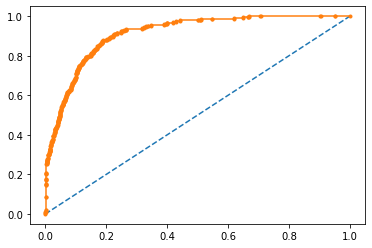

In [38]:
# AUC and ROC for the training data

# predict probabilities
probs = clf.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.924


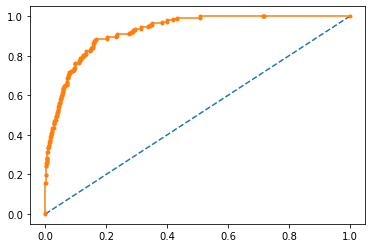

In [39]:
# AUC and ROC for the test data

# predict probabilities
probs = clf.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

**We can see the model has given almost same performances for both training and testing data.**